# Qiskit

[Qiskit](https://qiskit.org/) is open-source software for working with quantum computers at the level of circuits, pulses, and algorithms.

See the [documentation](https://qiskit.org/documentation/) for more details.

# Qiskit Terra

The fundamental package of Qiskit -- [Terra](https://github.com/Qiskit/qiskit-terra), provides the basic building blocks (circuits, gates, operators, etc.) which are necessary to program quantum computers.

In [ ]:
import numpy as np
from qiskit import *

## Circuit Basics <a name='basics'></a>


### Building the circuit

The basic element needed for your first program is the [QuantumCircuit](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.html).  We begin by creating a `QuantumCircuit` comprised of two qubits.

In [ ]:
# Create a Quantum Circuit acting on a quantum register of two qubits
circ = QuantumCircuit(2)

After you create the circuit, you can add gates ("operations") to manipulate the qubits. As you proceed through the tutorials you will find more gates and circuits; below is an example of a quantum circuit that creates a Bell-state (i.e. a maximally entangled two-qubit state):

$$|\psi\rangle = \left(|00\rangle+|11\rangle\right)/\sqrt{2}.$$

To create such a state, we start with a two-qubit quantum [register](https://en.wikipedia.org/wiki/Quantum_register). By default, each qubit in the register is initialized to $|0\rangle$. To make the Bell state, we apply the following gates:
- A [Hadamard](https://qiskit.org/documentation/stubs/qiskit.circuit.library.HGate.html) gate $H$ on qubit 0, which puts it into the superposition state $\left(|0\rangle+|1\rangle\right)/\sqrt{2}$.
- A [controlled-Not](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.cx.html#qiskit.circuit.QuantumCircuit.cx) operation ($C_{X}$) between qubit 0 and qubit 1 which results in the Bell state $\left(|00\rangle+|11\rangle\right)/\sqrt{2}.$

If you don't know what the Hadamard and CNOT gates are, please take a look further below in this notebook (or check [Wikipedia](https://en.wikipedia.org/wiki/Quantum_logic_gate)).

In Qiskit, operations can be added to the circuit one by one, as shown below.

In [ ]:
# Add a H gate on qubit 0, putting this qubit in superposition.
circ.h(0)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
circ.cx(0, 1)

### Visualize Circuit <a name='visualize'></a>

You can visualize your circuit using Qiskit `QuantumCircuit.draw()`, which plots the circuit in the form of text.

In [ ]:
circ.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

In this circuit, the qubits are put in order, with qubit zero at the top and qubit one at the bottom. The circuit is read left to right (meaning that gates that are applied earlier in the circuit show up further to the left).

You can also use matplotlib for a nicer visualization output.

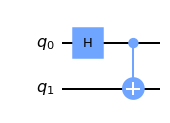

In [ ]:
circ.draw('mpl')

$\color{red}{\text{Exercise 1: Construct a  GHZ state } |\psi\rangle = \left(|000\rangle+|111\rangle\right)/\sqrt{2} \text{ and draw the output circuit}}$

The GHZ state is the 3-qubit analog of the Bell state defined above and the corresponding circuit looks very similar.

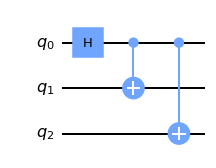

In [ ]:
circ = QuantumCircuit(3)
#Your code goes here

circ.h(0)
circ.cx(0, 1)
circ.cx(0, 2)
circ.draw('mpl')

*Hint for exercise 1 (double click to reveal):* $\color{white}{\text{What happens if you add an additional CNOT gate at the end of the circuit?}}$

### Visualize the quantum state

Remember that a general single qubit state can be expressed as

$$\left|\psi\right\rangle = \cos(\theta/2)\left|0\right\rangle + \sin(\theta/2)e^{i\phi}\left|1\right\rangle$$

where $0\leq \phi < 2\pi$, and $0\leq \theta \leq \pi$.

If we interpret $\theta$ and $\phi$ as spherical co-ordinates ($r=1$, since the normalization of the qubit state is 1), we can plot any single qubit state on the surface of a sphere, known as the [Bloch sphere](https://en.wikipedia.org/wiki/Bloch_sphere).

If we have a multi-qubit system we can plot the reduced density matrix of each qubit on the Bloch sphere instead:

$$\rho_{q_0} = \text{Tr}_{q_1...q_n}|\psi\rangle\langle\psi|= \frac{1}{2}(I + \vec{a}\cdot\vec{\sigma})$$

where $\vec{a}$ denotes the vector on the Bloch sphere. In this case, the state will not lie on the surface of the sphere anymore ($r=|\vec{a}|<1$), if the qubit is entangled with the rest of the system.

In [ ]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

Initially, the qubits are always in the all-$\left|0\right\rangle$ state which by convention corresponds to the northpole of the Bloch sphere.

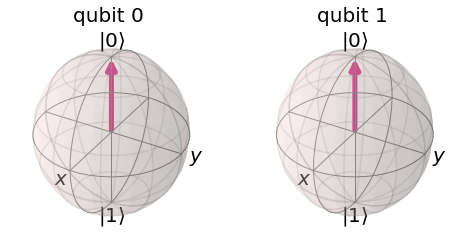

In [ ]:
qc = QuantumCircuit(2)

state = Statevector.from_instruction(qc) # retrieve quantum state in vector representation
plot_bloch_multivector(state) # plot reduced density matrices of each qubit on Bloch spheres

In the Bell circuit above, the Hadamard gate rotates the first qubit into the state $|+\rangle=\left(|0\rangle+|1\rangle\right)/\sqrt{2}$ which is now aligned along the x-axis of the Bloch sphere.

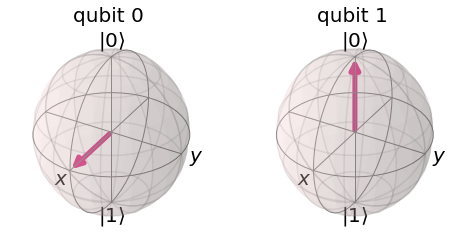

In [ ]:
qc.h(0)
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

$\color{red}{\text{Exercise 2: Plot the Bell state on the Bloch spheres}}$



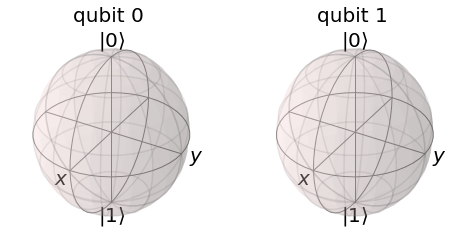

In [ ]:
#Your code goes here

qc.cx(0, 1)
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

If you cannot see the arrows on the spheres, and you have no idea what's going on try to compute the two vectors $\vec a_1$ and $\vec a_2$ that define the two density matrices?

*Hint for exercise 2:* $\color{white}{\text{The Bell state is a maximally entangled two-qubit state. What is the reduced density matrix of either of the two qubits? What does this mean for the length of the Bloch vector?}}$

The Bell state is a maximally entangled two-qubit state. The reduced density matrix of each qubit is just the identity matrix.

$$\rho_{q_0} = \text{Tr}_{q_1...q_n}|\psi\rangle\langle\psi|= \frac{1}{2}(I + \vec{a}\cdot\vec{\sigma})$$

which means that the Bloch vectors $\vec{a}_1$ and $\vec{a}_2$ of the two qubits are zero.

# Important gates

For a full list of all gates, check the "Frequently_used_operations" notebook or Qiskit's [circuit library](https://qiskit.org/documentation/apidoc/circuit_library.html).

If you are already familiar with these gates, feel free to skip this section and move to the next notebook.

In [ ]:
from qiskit.quantum_info.operators import Operator

#### Hadamard gate

We have already encountered the Hadmard gate. This gate describes a $\pi$ rotation about the X+Z axis, and has the effect of changing computation basis from $|0\rangle,|1\rangle$ to $|+\rangle,|-\rangle$ and vice-versa.

$$
H = 
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1\\
1 & -1
\end{pmatrix}
$$

In [ ]:
qc = QuantumCircuit(1)
qc.h(0)
qc.draw()

┌───┐
q: ┤ H ├
   └───┘

In [ ]:
# This computes the matrix representation of the circuit unitary
Operator(qc)

Operator([[ 0.70710678+0.j,  0.70710678+0.j],
          [ 0.70710678+0.j, -0.70710678+0.j]],
         input_dims=(2,), output_dims=(2,))

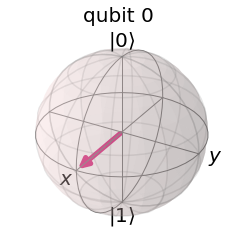

In [ ]:
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

### Pauli gates

#### $X$: bit-flip gate

The bit-flip gate $X$ is defined as:

$$
X   =  
\begin{pmatrix}
0 & 1\\
1 & 0
\end{pmatrix}
$$

In [ ]:
qc = QuantumCircuit(1)
qc.x(0)
qc.draw()

┌───┐
q: ┤ X ├
   └───┘

In [ ]:
Operator(qc)

Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))

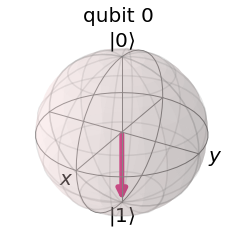

In [ ]:
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

#### $Y$: bit- and phase-flip gate

The $Y$ gate is defined as:

$$
Y  = 
\begin{pmatrix}
0 & -i\\
i & 0
\end{pmatrix}
$$

In [ ]:
qc = QuantumCircuit(1)
qc.y(0)
qc.draw()

┌───┐
q: ┤ Y ├
   └───┘

In [ ]:
Operator(qc)

Operator([[0.+0.j, 0.-1.j],
          [0.+1.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))

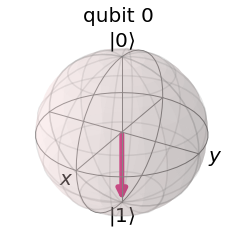

In [ ]:
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

#### $Z$: phase-flip gate

The phase-flip gate $Z$ is defined as:

$$
Z = 
\begin{pmatrix}
1 & 0\\
0 & -1
\end{pmatrix}
$$

In [ ]:
qc = QuantumCircuit(1)
qc.z(0)
qc.draw()

┌───┐
q: ┤ Z ├
   └───┘

In [ ]:
Operator(qc)

Operator([[ 1.+0.j,  0.+0.j],
          [ 0.+0.j, -1.+0.j]],
         input_dims=(2,), output_dims=(2,))

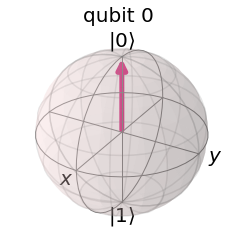

In [ ]:
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

$\color{red}{\text{Exercise 3: In what direction does the Bloch vector point if you start in $|0\rangle$, first apply a Hadmard and then a Z gate to a qubit?}}$

After you thought about your answer verify if you are correct by plotting the state on the Bloch sphere.

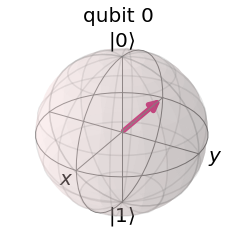

In [ ]:
#Your code goes here

qc = QuantumCircuit(1)
qc.h(0)
qc.z(0)
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

It points in the "negative $x$" direction or along $|-\rangle$.

### Standard Rotations

The standard rotation gates are those that define rotations around the Paulis $P=\{X,Y,Z\}$. They are defined as 

$$ R_P(\theta) = \exp(-i \theta P/2) = \cos(\theta/2)I -i \sin(\theta/2)P$$

#### Rotation around X-axis

$$
R_x(\theta) = 
\begin{pmatrix}
\cos(\theta/2) & -i\sin(\theta/2)\\
-i\sin(\theta/2) & \cos(\theta/2)
\end{pmatrix}
$$

In [ ]:
from math import pi

qc = QuantumCircuit(1)
qc.rx(pi/2,0) # define the angle of the rotation
qc.draw()

┌─────────┐
q: ┤ Rx(π/2) ├
   └─────────┘

In [ ]:
Operator(qc)

Operator([[0.70710678+0.j        , 0.        -0.70710678j],
          [0.        -0.70710678j, 0.70710678+0.j        ]],
         input_dims=(2,), output_dims=(2,))

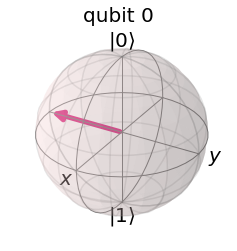

In [ ]:
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

Similarly, you can also rotate around the Y-and Z-axis. Try it out!

### Controlled Pauli Gates

#### Controlled-X (or, Controlled-NOT) gate
The Controlled-NOT gate flips the `target` qubit when the control qubit is in the state $\left|1\right\rangle$ and leaves it unchanged otherwise. If we take the MSB (most significant bit) as the control qubit (e.g. `cx(1,0)`), then the matrix would look like

$$
C_X = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0
\end{pmatrix}. 
$$

However, when the LSB (least significant bit) is the control qubit, (e.g. `cx(0,1)`), this gate is equivalent to the following matrix:

$$
C_X = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0
\end{pmatrix}. 
$$

In [ ]:
qc = QuantumCircuit(2)
qc.cx(0,1)
qc.draw()

q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘

In [ ]:
Operator(qc)

Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

Similarly, you can also use controlled-Y and-Z gates.

### SWAP gate

The SWAP gate exchanges the two qubits. It transforms the basis vectors as

$$\left|00\right\rangle \rightarrow \left|00\right\rangle~,~\left|01\right\rangle \rightarrow \left|10\right\rangle~,~\left|10\right\rangle \rightarrow \left|01\right\rangle~,~\left|11\right\rangle \rightarrow \left|11\right\rangle,$$

which gives a matrix representation of the form

$$
\mathrm{SWAP} = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1
\end{pmatrix}.
$$

In [ ]:
qc = QuantumCircuit(2)
qc.swap(0, 1)
qc.draw()

q_0: ─X─
      │ 
q_1: ─X─

In [ ]:
Operator(qc)

Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

$\color{red}{\text{Optional Exercise 4: Look at Qiskit's circuit library and try out one or two more gates.}}$

You can also apply several gates after each other and observe how the quantum state changes on the Bloch sphere.

In [ ]:
#Your code goes here

These notebooks are comprised of text and code taken from Qiskit's [documentation](https://qiskit.org/documentation/), [tutorials](https://qiskit.org/documentation/tutorials.html#quantum-circuits), [textbook](https://qiskit.org/textbook/preface.html), and previous challenges facilitated by Qiskit.